# **Tugas Mining Data Twitter Untuk Menganalisis Sentimen atau Opini Suatu Topik**


Nama : Bihubbil Choir Aidifta<p>
NIM : 190411100121

## Web Mining

Web Mining adalah proses teknik Data Mining untuk secara otomatis menemukan dan mengekstrak informasi dari suatu halaman Web. Tujuan utama penambangan web adalah menemukan informasi yang berguna.

Penambangan web membantu meningkatkan kekuatan mesin pencari web dengan mengklasifikasikan dokumen web dan mengidentifikasi halaman web.


---



# **Instalasi Library**
Pada tahap ini dilakukan instalasi library-library yang nantinya dibutuhkan untuk menjalankan program, berikut adalah library yang dibutuhkan : 

---



> ##  Snscrape
Snscrape merupakan perpustakaan / library sumber terbuka (open source) yang ditulis dengan bahasa pemrograman python dan berguna untuk melakukan scraping atau ekstraksi dari jejaring sosial. Pada program ini kita akan menggunakan Snscrape untuk mengambil/mengekstrak data Tweets dari Twitter.

> ## Pandas
Pandas merupakan perpustakaan / library sumber terbuka (Open Source) yang ditulis dengan bahasa pemrograman python dan berguna untuk melakukan analisis dan manipulasi data, khususnya untuk memanipulasi tabel numerik dan deret waktu.
Pada program ini kita akan memanfaatkan Pandas DataFrame untuk menempatkan data hasil crawling.

> ## Sastrawi
Sastrawi merupakan perpustakaan / library sumber terbuka yang ditulis dengan bahasa pemrograman python dan berguna untuk melakukan pengurangan kata-kata yang ter- infleksi dalam bahasa Indonesia ke bentuk baku-nya atau sesuai dengan standar kamus.

> ## Scikit-learn
Scikit-learn adalah library machine learning open source  untuk bahasa pemrograman Python. Ini fitur berbagai klasifikasi, regresi, algoritma pengelompokan, dan alat yang efisien untuk data mining dan analisis data. Ini dibangun di atas NumPy, SciPy, dan Matplotlib.


In [ ]:
%%capture
!pip install snscrape
!pip install pandas
!pip install Sastrawi
!pip install scikit-learn

# **Menulis Script Konfigurasi Snscrape**
Pada tahap ini akan dibuat script kofigurasi Snscrape, script ini sendiri berupa modul yang berisi fungsi-fungsi untuk melakukan crawling dan scraping data tweet yang berada pada Twitter.<p>
Berikut adalah penjelasan singkat mengenai script tersebut.

---
<br>

```
search_query = "Jokowi"
jumlah_tweets = 100
tweets = []
```

Variable tersebut merupakan variable yang berguna untuk mendefinisikan "search query" yang akan digunakan untuk mencari topik spesifik di twitter, "jumlah tweet" yang nantinya akan diambil, serta sebuah wadah berupa "list" yang nantinya akan digunakan untuk menyimpan data hasil scrape.

---

<br>

```
for tweet in sntwitter.TwitterSearchScraper(search_query).get_items():
    
    if len(tweets) == jumlah_tweets:
        break
    else:
        tweets.append([tweet.date, tweet.username, tweet.content, 'None'])
```

Loop ini berfungsi untuk mengambil tiap data tweet yang berhasil diambil dari twitter berdasarkan query yang telah kita definisikan sebelumnya. Pada loop tersebut terdapat pengecekan kondisi yang akan mengecek jumlah tweet yang berhasil diambil, selama loop ini belum mencapai batas jumlah tweet yang kita tentukan sebelumnya, maka loop ini akan terus melakukan penambahan data tweet ke wadah(list) yang telah dibuat sebelumnya.


---

<br>

```
df = pd.DataFrame(tweets, columns=['Date', 'User', 'Tweet', 'Label'])
```
Variable diatas berfungsi untuk mendefinisikan data tweet yang sebelumnya telah ditempatkan di wadah(list), dalam bentuk Pandas Dataframe.





In [ ]:

import snscrape.modules.twitter as sntwitter
import pandas as pd
# from google.colab import data_table
# data_table.enable_dataframe_formatter()

search_query = "Jokowi"
jumlah_tweets = 100
tweets = []


for tweet in sntwitter.TwitterSearchScraper(search_query).get_items():
    
    if len(tweets) == jumlah_tweets:
        break
    else:
        tweets.append([tweet.date, tweet.username, tweet.content, 'None'])
        
df = pd.DataFrame(tweets, columns=['Date', 'User', 'Tweet', 'Label'])
print(df)


                        Date             User  \
0  2022-10-04 14:56:54+00:00         BaiqiRon   
1  2022-10-04 14:56:43+00:00    ubinhasnanto1   
2  2022-10-04 14:56:42+00:00   Hardiyansyah07   
3  2022-10-04 14:56:38+00:00   HastoSuprayogo   
4  2022-10-04 14:56:33+00:00        joshtwiti   
5  2022-10-04 14:56:15+00:00      BendaL4ngit   
6  2022-10-04 14:56:13+00:00          idNalar   
7  2022-10-04 14:56:08+00:00     kliklive_com   
8  2022-10-04 14:55:53+00:00       jokoselong   
9  2022-10-04 14:55:42+00:00          ednar21   
10 2022-10-04 14:55:42+00:00      Ariocarpus_   
11 2022-10-04 14:55:37+00:00         AriyonoL   
12 2022-10-04 14:55:30+00:00    ChebonxInsyaf   
13 2022-10-04 14:55:20+00:00        S4fitr1HS   
14 2022-10-04 14:55:06+00:00  JohnDamanik0408   
15 2022-10-04 14:54:56+00:00        mieleorso   
16 2022-10-04 14:54:47+00:00          jakpoes   
17 2022-10-04 14:54:32+00:00       bhangantho   
18 2022-10-04 14:54:30+00:00    PamungkasRami   
19 2022-10-04 14:54:

## Melakukan Pengecekan Berkas Hasil Scrape Lama

Karena setelah melakukan scraping data tweet kita perlu memberikan label secara manual, maka untuk menghindari berkas lama tertimpa oleh berkas baru, disini kita akan melakukan pengecekan berkas hasil scrape lama, apakah ada pada direktori atau tidak. Jika berkas hasil scrape lama tidak ditemukan pada direktori, maka hasil scrape sebelumnya (yang ada pada Pandas Dataframe) akan diespor menjadi berkas csv.

In [ ]:
%%capture
import os
!wget https://raw.githubusercontent.com/smilesense/datasets/master/ppw/19_121_tweets_labeled.csv -O 19_121_tweets_labeled.csv


output_stream = os.popen('cat 19_121_tweets_labeled.csv')
res = output_stream.read()
if res == '':
  df.to_csv('19_121_tweets_labeled.csv')

# **Import Hasil**
Setelah perintah sebelumnya berhasil dijalankan, selanjutnya kita akan melakukan import isi berkas hasil scrape sebelumnya kedalam Pandas DataFrame.

In [ ]:
import pandas as pd
pd.options.mode.chained_assignment = None
# pd.options.display.max_colwidth = None
# pd.options.display.max_columns = None
# pd.options.display.max_rows = None
df = pd.read_csv('19_121_tweets_labeled.csv', usecols=['User', 'Tweet', 'Label'])
df

,User,Tweet,Label
0,Truncvg,@jokowi Mentolo napuk cocot.e samean aku pak\r...,Negatif
1,WartaEkonomi,Achmad Nur Hidayat Ungkap Kemungkinan Kaitan P...,Negatif
2,okezonenews,Bjorka: Apa Anda (Jokowi) butuh bantuan saya u...,Negatif
3,infoBanyumas12,#Foto Presiden Jokowi mengakui kenaikan harga ...,Positif
4,Metdro2,@Yatie84991237 @_TNIAL_ @edhi_shi @JohnVirgoVj...,Negatif
5,Div4_Kir4n4,@jokowi Jual aja pak biar dapat utang👍,Negatif
6,JN_Eri,@Harno140484 @HusinShihab @KejaksaanRI @mohmah...,Negatif
7,igoynixx,"@jokowi Jangan lupa janji2nya, yaa pak...",Negatif
8,siswantos208,@yosnggarang @jokowi Emg surplus apbn buat sub...,Negatif
9,AkuTerpesona8,@mahasiswigenz @jokowi DPRD cari temen baru ?\...,Negatif


# **Preprocessing Data Tweets**

## Case Folding
Case folding merupakan tahap text preprocessing yang berguna untuk :


*   Mengubah huruf kapital menjadi huruf kecil
*   Mengapus tanda baca
*   Menghapus angka
*   Menghapus karakter kosong

<br>

Sebelum melakukan case folding diatas, kode ini juga melakukan penghapusan link dan mention yang ada pada data tweet.



In [ ]:
import string

#Mengapus link dan mention
df['Tweet'] = df['Tweet'].replace(r'\s+',' ', regex=True)
indx = 0
for i in df['Tweet']:
  temp = df['Tweet'][indx].split()
  for j in temp:
    if 'http' in j:
      df['Tweet'] = df['Tweet'].replace(r'%s'%j," ", regex=True)
    if '@' in j:
      df['Tweet'] = df['Tweet'].replace(r'%s'%j," ", regex=True)
  indx+=1



#mengubah menjadi huruf kecil
df['Tweet'] = df['Tweet'].str.lower()

#menghapus tanda baca
for char in string.punctuation:
    df['Tweet'] = df['Tweet'].replace(r'[\%s]'%char," ", regex=True)

#menghapus angka
df['Tweet'] = df['Tweet'].replace(r'\d+',' ', regex=True)

#menghapus karakter kosong
df['Tweet'] = df['Tweet'].replace(r'\s+',' ', regex=True)
df['Tweet'][2]



'bjorka apa anda jokowi butuh bantuan saya untuk menyelesaikan masalah ini pak '

## Stopwords Removal
StopWords Removal merupakan tahap prepocessing yang berguna untuk menhapus kata umum yang biasanya muncul dalam jumlah besar dan dianggap tidak memiliki makna. Contoh stopword dalam bahasa Indonesia adalah “yang”, “dan”, “di”, “dari”, dll.


In [ ]:
import urllib.request, json 
with urllib.request.urlopen("https://raw.githubusercontent.com/smilesense/stopwords-id/master/stopwords-id.json") as list_stopwords:
    data_stopword = json.load(list_stopwords)

for i in data_stopword:
    df['Tweet'] = df['Tweet'].replace(r'\b%s\b'%i, '', regex=True)
df['Tweet'] = df['Tweet'].replace(r'\s+',' ', regex=True)

df['Tweet'][2]

'bjorka jokowi butuh bantuan menyelesaikan '

## Stemming
Stemming merupakan tahapan dalam preprocessing yang berguna untuk mengubah kata yang memiliki imbuhan menjadi kata dasarnya. Contohnya adalah, misal pada suatu teks terdapat kata "berjalan", maka dengan menerapkan metode stemming, teks tersebut akan diubah menjadi kata "jalan" atau bentuk dasar dari kata "berjalan". 

In [ ]:
# import StemmerFactory class
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()
# stemming process

try:
  ind = 0
  for sentence in df['Tweet']:
      df['Tweet'][ind] = stemmer.stem(str(sentence))
      ind+=1
  raise KeyboardInterrupt
except KeyboardInterrupt:
  print(df['Tweet'][2])
else :
  print(df['Tweet'][2])


bjorka jokowi butuh bantu selesai


## Tokenisasi

Tokenizing adalah tahap preprocessing yang berguna untuk memisahkan teks menjadi potongan-potongan yang disebut sebagai token untuk kemudian di analisa. Kata, angka, simbol, tanda baca dan entitas penting lainnya dapat dianggap sebagai token.

In [ ]:
indeks = 0
df2 = df.copy()
for tweet in df2['Tweet']:
    df2['Tweet'][indeks] = str(tweet).split()
    indeks+=1

df2['Tweet'][2]


['bjorka', 'jokowi', 'butuh', 'bantu', 'selesai']

## Hasil Preprocessing


In [ ]:
df2

,User,Tweet,Label
0,Truncvg,"[mentolo, napuk, cocot, e, samean, ga, nduwe, ...",Negatif
1,WartaEkonomi,"[achmad, nur, hidayat, kait, lengser, suharso,...",Negatif
2,okezonenews,"[bjorka, jokowi, butuh, bantu, selesai]",Negatif
3,infoBanyumas12,"[foto, presiden, jokowi, aku, naik, harga, bbm...",Positif
4,Metdro2,"[iya, dluhuran]",Negatif
5,Div4_Kir4n4,"[jual, aja, biar, utang]",Negatif
6,JN_Eri,"[bang, yg, berita, hoax, thdap, orang, kaliman...",Negatif
7,igoynixx,"[lupa, janji, nya, yaa]",Negatif
8,siswantos208,"[emg, surplus, apbn, subsidi, klo, hapus, subs...",Negatif
9,AkuTerpesona8,"[dprd, cari, temen]",Negatif


# **Term Frequency (TF)**
Term Frequency merupakan metode yang digunakan untuk mengetahui seberapa sering suatu kata muncul dalam suatu teks. Semakin banyak frekuensi kemunculan dari kata tsb, semakin besar pula nanti nilainya.



## Term Frequency Keseluruhan

In [ ]:
listkata = []
for tweet in df['Tweet']:
    listkata = listkata + str(tweet).split()

listkata_nodup = list(dict.fromkeys(listkata))
hasil_hitung = {}
for test1 in listkata_nodup:
    jumlah = 0
    for test2 in range(len(listkata)):
        if test1 == listkata[test2]:
            jumlah+=1
    hasil_hitung.update({'%s'%test1 : jumlah})
    
hasil_hitung = dict(sorted(hasil_hitung.items(), key=lambda item: item[1], reverse=True))
print(hasil_hitung)

{'jokowi': 37, 'yg': 27, 'presiden': 12, 'gak': 10, 'ga': 9, 'bangun': 9, 'bbm': 9, 'aja': 9, 'nya': 6, 'demo': 6, 'rakyat': 6, 'bjorka': 5, 'naik': 5, 'perintah': 5, 'orang': 5, 'subsidi': 5, 'tau': 5, 'negeri': 5, 'anies': 5, 'kaya': 5, 'bantu': 4, 'kerja': 4, 'jawa': 4, 'to': 4, 'negara': 4, 'ya': 4, 'data': 4, 'amp': 4, 'periode': 4, 'tambal': 4, 'harga': 3, 'biar': 3, 'hoax': 3, 'janji': 3, 'surplus': 3, 'apbn': 3, 'blt': 3, 'nama': 3, 'bendung': 3, 'of': 3, 'indonesia': 3, 'penuh': 3, 'dasar': 3, 'tuh': 3, 'kompeten': 3, 'demokrat': 3, 'ganti': 3, 'ekonomi': 3, 'pasang': 3, 'tuju': 3, 'percaya': 3, 'jabat': 3, 'dosa': 3, 'jis': 3, 'e': 2, 'samean': 2, 'foto': 2, 'pengaruh': 2, 'laju': 2, 'inflasi': 2, 'berita': 2, 'lanjut': 2, 'anak': 2, 'klo': 2, 'uang': 2, 'bagus': 2, 'aceh': 2, 'beli': 2, 'deh': 2, 'raja': 2, 'ngibul': 2, 'klemer': 2, 'jakarta': 2, 'ambassador': 2, 'president': 2, 'in': 2, 's': 2, 'suara': 2, 'adlh': 2, 'tuhan': 2, 'mundur': 2, 'usaha': 2, 'rintis': 2, 'bin': 

## Term Frequency Tiap Tweet

In [ ]:
def terms(dataframe):
  # pd.options.mode.chained_assignment = None
  # pd.options.display.max_colwidth = None
  # pd.options.display.max_columns = None
  # pd.options.display.max_rows = None

  df3 = dataframe.copy()
  a = 1
  for inter in range(len(df3['Tweet'])):
      for fitur in hasil_hitung:
          df3['%s'%(fitur)] = 0
          a+=1

  for inter in range(len(df3['Tweet'])):
    for fitur in hasil_hitung:
        cek = df3['Tweet'][inter]
        jumlah = 0
        for iter2 in range(len(cek)):
          if fitur == cek[iter2]:
            jumlah+=1
        df3['%s'%(fitur)][inter] = jumlah
        a+=1
  df3.to_csv(r'my_data.csv', index=False)
  return df3
  

terms(df2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  # This is added back by InteractiveShellApp.init_path()


,User,Tweet,Label,jokowi,yg,presiden,gak,ga,bangun,bbm,...,citra,kasihan,prabowo,rela,puji,muji,jilat,pssi,pantes,suram
0,Truncvg,"[mentolo, napuk, cocot, e, samean, ga, nduwe, ...",Negatif,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,WartaEkonomi,"[achmad, nur, hidayat, kait, lengser, suharso,...",Negatif,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,okezonenews,"[bjorka, jokowi, butuh, bantu, selesai]",Negatif,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,infoBanyumas12,"[foto, presiden, jokowi, aku, naik, harga, bbm...",Positif,2,0,2,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,Metdro2,"[iya, dluhuran]",Negatif,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Div4_Kir4n4,"[jual, aja, biar, utang]",Negatif,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,JN_Eri,"[bang, yg, berita, hoax, thdap, orang, kaliman...",Negatif,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,igoynixx,"[lupa, janji, nya, yaa]",Negatif,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,siswantos208,"[emg, surplus, apbn, subsidi, klo, hapus, subs...",Negatif,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,AkuTerpesona8,"[dprd, cari, temen]",Negatif,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# **Seleksi Fitur Menggunakan Information Gain (Mutual Information)**

Information Gain Merupakan metode yang digunakan untuk mengukur seberapa penting / berpengaruh sebuah fitur terhadap hasil pengukuran. Penggunaan teknik ini dapat mereduksi dimensi fitur dengan cara mengukur reduksi Entropy sebelum dan sesudah pemisahan. Metode ini juga dikenal dengan sebutan Mutual Information, biasanya digunakan untuk mengetahui dependency antara dua variable "x" dan "y".


## Melakukan Training 
Training disini berfungsi untuk menghindari overfitting, yaitu keadaan dimana suatu model berusaha untuk mempelajari seluruh detail dalam data.

In [ ]:
df4 = pd.read_csv('my_data.csv')
df4['Label'].unique()

array(['Negatif', 'Positif'], dtype=object)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df4.drop(labels=['Label', 'User', 'Tweet'], axis=1),
    df4['Label'],
    test_size=0.3,
    random_state=0)
y_train

43    Negatif
4     Negatif
72    Negatif
17    Negatif
63    Negatif
8     Negatif
6     Negatif
59    Positif
38    Negatif
56    Negatif
34    Negatif
28    Positif
11    Negatif
54    Negatif
23    Negatif
10    Positif
31    Negatif
45    Negatif
78    Negatif
1     Negatif
32    Negatif
68    Negatif
14    Negatif
52    Negatif
19    Negatif
29    Negatif
60    Negatif
49    Negatif
24    Negatif
35    Negatif
18    Negatif
0     Negatif
79    Negatif
15    Positif
5     Negatif
62    Negatif
16    Positif
51    Positif
20    Positif
75    Negatif
25    Negatif
37    Negatif
46    Negatif
39    Negatif
65    Negatif
58    Negatif
12    Negatif
70    Positif
36    Negatif
21    Negatif
9     Negatif
77    Negatif
67    Positif
64    Negatif
47    Negatif
44    Negatif
Name: Label, dtype: object

## Melakukan seleksi Fitur
Setelah melakukan training untuk menghindari overfitting, selanjutnya data hasil training tersebut akan dilakukan feature selection menggunakan metode mutual information classification

In [ ]:
from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info

array([0.12127354, 0.        , 0.0042269 , 0.00699421, 0.        ,
       0.        , 0.07474288, 0.04966779, 0.        , 0.00683063,
       0.        , 0.01983878, 0.01514787, 0.        , 0.03425817,
       0.        , 0.02325048, 0.        , 0.00755097, 0.        ,
       0.        , 0.        , 0.        , 0.02958124, 0.11113822,
       0.0470017 , 0.        , 0.        , 0.00163374, 0.02809478,
       0.09016512, 0.03950089, 0.03073458, 0.0838875 , 0.        ,
       0.0504196 , 0.        , 0.05528137, 0.00556978, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.00399109, 0.02015726, 0.07092504, 0.        , 0.        ,
       0.        , 0.02919395, 0.11692813, 0.        , 0.01894918,
       0.        , 0.        , 0.03459636, 0.00168568, 0.        ,
       0.        , 0.01157298, 0.        , 0.03074614, 0.03013717,
       0.        , 0.05682064, 0.        , 0.        , 0.08809176,
       0.00116724, 0.        , 0.        , 0.01443068, 0.06813

## Melakukan Ranking Fitur
Setelah selesai melakukan seleksi fitur, pada tahap ini kita akan meranking fitur tersebut berdasarkan tingkatan information gain (mutual information) yang dimiliki.

In [ ]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)
tetdf = pd.DataFrame(mutual_info)
tetdf

,0
jokowi,0.121274
yg,0.000000
presiden,0.004227
gak,0.006994
ga,0.000000
bangun,0.000000
bbm,0.074743
aja,0.049668
nya,0.000000
demo,0.006831


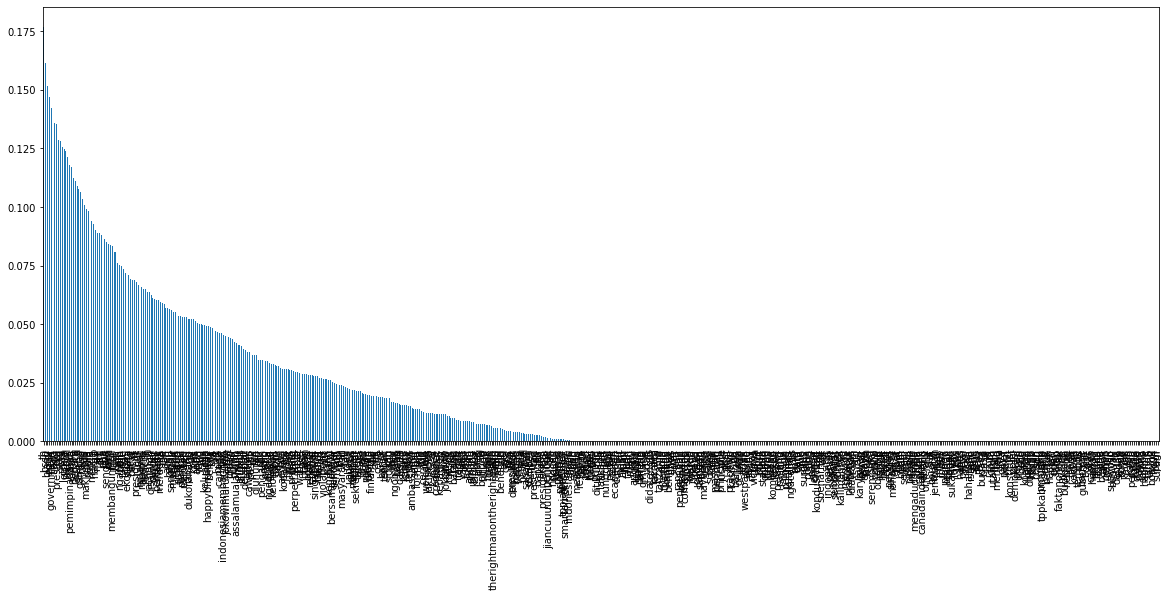

In [ ]:
#llet's plot the ordered mutual_info values per feature
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [ ]:
from sklearn.feature_selection import SelectKBest

sel_best = SelectKBest(mutual_info_classif, k=50)
sel_best.fit(X_train, y_train)
X_train.columns[sel_best.get_support()]

Index(['jokowi', 'surplus', 'bendung', 'of', 'kompeten', 'deh', 'klemer',
       'gimana', 'sih', 'daya', 'desa', 'si', 'cocot', 'dluhuran', 'hapus',
       'buatin', 'bisa', 'presidential', 'canadaindonesia', 'plis', 'inpes',
       'malu', 'nanya', 'lo', 'ngedukun', 'sample', 'langka', 'aje', 'entar',
       'pesimis', 'hebat', 'asing', 'ricuh', 'balau',
       'therightmanontherightplace', 'tpp', 'sobat', 'oot', 'sumber',
       'ecapedeh', 'tanzania', 'kek', 'model', 'mulu', 'doang', 'pduli',
       'survey', 'justice', 'telek', 'jilat'],
      dtype='object')

# **Klasifikasi sentimen menggunakan metode [KNN]** 
k-nearest neighbor (KNN) adalah algoritma pembelajaran mesin terawasi yang sederhana dan mudah diterapkan yang dapat digunakan untuk menyelesaikan masalah klasifikasi dan regresi. Berhenti sebentar! Mari kita membongkar itu.

pembelajaran mesin terawasi sendiri merupakan algoritma yang bergantung pada data input berlabel untuk mempelajari fungsi yang menghasilkan output yang sesuai ketika diberikan data baru yang tidak berlabel.


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
list_y_pred = []
for i in range(2,len(y_train)):
  neigh = KNeighborsClassifier(n_neighbors=i)
  neigh.fit(X_train, y_train)
  y_pred = neigh.predict(X_test)
  list_y_pred2 = [i, y_pred] 
  list_y_pred.append(list_y_pred2)
list_y_pred

[[2, array(['Negatif', 'Negatif', 'Negatif', 'Negatif', 'Negatif', 'Negatif',
         'Negatif', 'Negatif', 'Negatif', 'Negatif', 'Negatif', 'Negatif',
         'Negatif', 'Negatif', 'Positif', 'Negatif', 'Negatif', 'Negatif',
         'Negatif', 'Positif', 'Negatif', 'Negatif', 'Negatif', 'Negatif',
         'Negatif'], dtype=object)],
 [3, array(['Negatif', 'Negatif', 'Negatif', 'Positif', 'Positif', 'Negatif',
         'Positif', 'Negatif', 'Negatif', 'Positif', 'Negatif', 'Negatif',
         'Negatif', 'Negatif', 'Positif', 'Positif', 'Positif', 'Negatif',
         'Negatif', 'Positif', 'Negatif', 'Negatif', 'Negatif', 'Negatif',
         'Negatif'], dtype=object)],
 [4, array(['Negatif', 'Negatif', 'Negatif', 'Negatif', 'Negatif', 'Negatif',
         'Negatif', 'Negatif', 'Negatif', 'Negatif', 'Negatif', 'Negatif',
         'Negatif', 'Negatif', 'Negatif', 'Negatif', 'Negatif', 'Negatif',
         'Negatif', 'Negatif', 'Negatif', 'Negatif', 'Negatif', 'Negatif',
         'Negatif

## Melakukan Pengecekan tingkat akurasi KNN dengan parameter jumlah Nearest Neighbors yang berbeda.

Pengecekan tingkat akurasi dari tiap "parameter jumlah Nearest Neighbors" yang berbeda ini berguna untuk dapat mengetahui berapa "jumlah Nearest Neighbors" yang memiliki akurasi paling tinggi.

In [ ]:
from sklearn.metrics import make_scorer, accuracy_score,precision_score

list_akurasi = []
for i in range(len(list_y_pred)):
  # print(list_pred[i])
  # testing = neigh.predict(X_test) 
  accuracy_neigh=round(accuracy_score(y_test,list_y_pred[i][1])* 100, 2)
  acc_neigh = round(neigh.score(X_train, y_train) * 100, 2)
  list_akurasi2 = [list_y_pred[i][0], accuracy_neigh]
  list_akurasi.append(list_akurasi2)
list_akurasi

[[2, 76.0],
 [3, 68.0],
 [4, 68.0],
 [5, 68.0],
 [6, 68.0],
 [7, 68.0],
 [8, 68.0],
 [9, 68.0],
 [10, 68.0],
 [11, 68.0],
 [12, 68.0],
 [13, 68.0],
 [14, 68.0],
 [15, 68.0],
 [16, 68.0],
 [17, 68.0],
 [18, 68.0],
 [19, 68.0],
 [20, 68.0],
 [21, 68.0],
 [22, 68.0],
 [23, 68.0],
 [24, 68.0],
 [25, 68.0],
 [26, 68.0],
 [27, 68.0],
 [28, 68.0],
 [29, 68.0],
 [30, 68.0],
 [31, 68.0],
 [32, 68.0],
 [33, 68.0],
 [34, 68.0],
 [35, 68.0],
 [36, 68.0],
 [37, 68.0],
 [38, 68.0],
 [39, 68.0],
 [40, 68.0],
 [41, 68.0],
 [42, 68.0],
 [43, 68.0],
 [44, 68.0],
 [45, 68.0],
 [46, 68.0],
 [47, 68.0],
 [48, 68.0],
 [49, 68.0],
 [50, 68.0],
 [51, 68.0],
 [52, 68.0],
 [53, 68.0],
 [54, 68.0],
 [55, 68.0]]

### Tampilan table tingkat akurasi KNN dengan perbedaan parameter jumlah Nearest Neighbors

In [ ]:
df5 = pd.DataFrame(list_akurasi, columns=["Nearest Neighbors","Akurasi"])
df5

,Nearest Neighbors,Akurasi
0,2,76.0
1,3,68.0
2,4,68.0
3,5,68.0
4,6,68.0
5,7,68.0
6,8,68.0
7,9,68.0
8,10,68.0
9,11,68.0


### Tampilan grafik tingkat akurasi KNN dengan perbedaan parameter jumlah Nearest Neighbors.

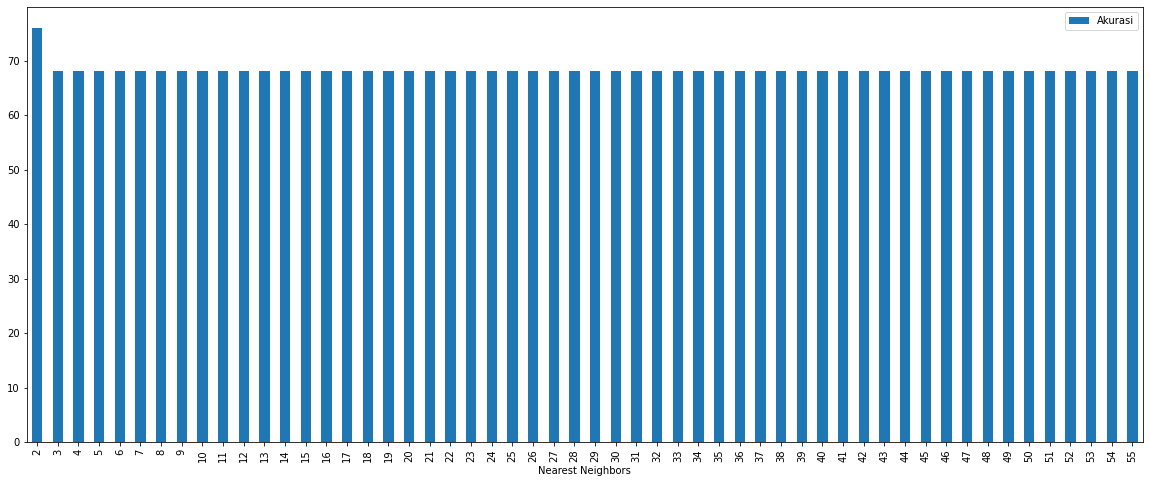

In [ ]:
df5.plot.bar(x='Nearest Neighbors',y='Akurasi',figsize=(20, 8))

# **Clustering sentimen menggunakan metode [KMEANS]**

Clustering, secara umum, adalah metode "belajar tanpa pengawasan". Itu berarti kita tidak memiliki variabel target.

K-means clustering merupakan yang paling umum digunakan untuk mempartisi kumpulan data yang diberikan ke dalam kumpulan k grup (yaitu k cluster ), di mana k mewakili jumlah grup yang ditentukan sebelumnya oleh analis .


## Reduksi dimensi menggunakan metode [Principal Component Analysis(PCA)]

Principal Component Analysis(PCA) merupakan metode yang berfungsi untuk mengubah data berdimensi tinggi menjadi data berdimensi rendah dengan memilih fitur terpenting yang menangkap informasi maksimum tentang kumpulan data. Fitur dipilih berdasarkan varians yang ditimbulkannya dalam output. Fitur yang menyebabkan varians tertinggi adalah komponen utama pertama. Fitur yang bertanggung jawab untuk varian tertinggi kedua dianggap sebagai komponen utama kedua, dan seterusnya.

In [ ]:
from sklearn.decomposition import PCA
df_fcluster = df4.drop(labels=['Label', 'User', 'Tweet'], axis=1)
# df_fcluster
pca = PCA(n_components=2)
df_fcluster = pca.fit_transform(df_fcluster)
df_fclusters = pd.DataFrame(df_fcluster)
df_fclusters

,0,1
0,-0.554472,-0.012230
1,-0.076482,-0.653832
2,-0.101973,-0.528021
3,1.580074,-1.688966
4,-0.515446,0.075380
5,-0.580334,0.196061
6,1.000728,1.034502
7,-0.572323,0.088427
8,-0.671770,0.037459
9,-0.522293,0.076825


## Hasil Clustering

In [ ]:

from sklearn.cluster import KMeans

kmeans =KMeans(n_clusters=2)
kmeans=kmeans.fit(df_fcluster)
prediksi=kmeans.predict(df_fcluster)
centroids = kmeans.cluster_centers_

dfprediksi = pd.DataFrame(prediksi, columns=["Cluster"])
# dfcentroids = pd.DataFrame(centroids)
# hasil = dfcentroids.merge(dfprediksi,left_index=True, right_on='Cluster')
pd.options.display.max_rows = None
dfprediksi


,Cluster
0,1
1,1
2,1
3,0
4,1
5,1
6,0
7,1
8,1
9,1
